In [1]:
%matplotlib inline
import numpy as np  # importing libraries I will use
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns; sns.set()  # use seaborn plotting defaults
from pandas import read_csv
from scipy import stats
from sklearn.datasets import make_blobs  # many libraries form sklearn
from sklearn.datasets import make_circles
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
mpl.rcParams['figure.figsize'] = (12, 8)

from sklearn import svm
from sklearn import metrics

import scipy
import numpy
import matplotlib
import pandas
import sklearn
import seaborn as sb
%matplotlib inline
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
# Other machine learning modules
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
num_cols = range(0,57)
dataset = read_csv('Kaggle-data.csv', header= 0, usecols= num_cols) # importing csv
#Dropped the md5 hash column 
dataset = dataset.drop(['md5'], axis=1)
#Get the y values into a separate dataframe
y_vals = dataset.legitimate
# shows us the number of instances (rows) that belong to each class
print(dataset.groupby('legitimate').size())  
#Drop the y values from the original dataframe 
dataset = dataset.drop(['legitimate'], axis=1)
print(dataset)  # you will need to change the file directory

legitimate
0    140849
1     75503
dtype: int64
            ID  Machine  SizeOfOptionalHeader  Characteristics  \
0            1      332                   224             8450   
1            2      332                   224              258   
2            3      332                   224             8450   
3            4      332                   224             8450   
4            5      332                   224             8226   
...        ...      ...                   ...              ...   
216347  216348      332                   224              258   
216348  216349      332                   224            33167   
216349  216350      332                   224              258   
216350  216351      332                   224            33166   
216351  216352      332                   224              258   

        MajorLinkerVersion  MinorLinkerVersion  SizeOfCode  \
0                        8                   0       16896   
1                        9         

In [3]:
X_vals = dataset.iloc[:,:].values #
y_vals = y_vals.values

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
print(scaler.fit(X_vals))
MinMaxScaler()
max_data = scaler.data_max_
norm_data = scaler.transform(X_vals)

MinMaxScaler()


In [17]:
X_train, X_test, y_train, y_test = train_test_split(norm_data, y_vals, test_size = 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)
print("X-Train Shape:", X_train.shape)
print("y train Shape:", y_train.shape)
print("X-Test Shape:", X_test.shape)
print("y test shape:", y_test.shape)
print("X-Validation Shape:", X_val.shape)
print("y Validation shape:", y_val.shape)

X-Train Shape: (138464, 55)
y train Shape: (138464,)
X-Test Shape: (43271, 55)
y test shape: (43271,)
X-Validation Shape: (34617, 55)
y Validation shape: (34617,)


In [6]:
# pca = PCA(X_train.shape[1])
# pca.fit(X_train)
# # print(pca.components_.T)
# # print(pca.explained_variance_ratio_)
# print('Number of components:', pca.explained_variance_ratio_.shape[0] )

Number of components: 55


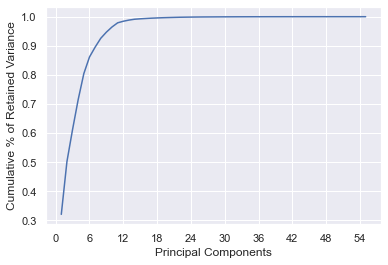

In [7]:
# n_comp = numpy.arange(55)
# n_comp = n_comp+1
# cumulative = numpy.cumsum(pca.explained_variance_ratio_)
# from matplotlib.pyplot import figure, show
# from matplotlib.ticker import MaxNLocator
# ax = figure().gca()
# ax.plot(n_comp,cumulative)
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# plt.xlabel('Principal Components')
# plt.ylabel('Cumulative % of Retained Variance')
# show()

Here we choose Principal Components = 3 so that we can perform SVM classification with visualizations.

In [8]:
# pca = PCA(n_components = 3)
# X_new_vals = pca.fit_transform(X_train)
# X_new_test = pca.fit_transform(X_test)
# print('Variance Retained:', sum(pca.explained_variance_ratio_))

Variance Retained: 0.6127635100074473


In [9]:
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [10]:
# Accuracy
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9874974001063067


In [11]:
# Precision
print("Precision: ", metrics.precision_score(y_test, y_pred))

Precision:  0.9818373951522357


In [12]:
# Recall
print("Recall: ", metrics.recall_score(y_test, y_pred))

Recall:  0.9824213587100185


In [20]:
# Tuning Hyper-Parameters
def exhaustive_search():  # make exhaustive grid search function to find the optimal 𝐶 and gamma values
    tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], # Set the parameters by cross-validation
                         'C': [1, 10, 100, 1000]}]

    scores = ['precision', 'recall']

    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()

        clf = GridSearchCV(SVC(), tuned_parameters, scoring='%s_macro' % score)
        clf.fit(norm_data, y_vals)

        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
        print()

        print("Detailed classification report:")
        print()
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
        print()
        y_true, y_pred = y_val, clf.predict(X_val)
        print(classification_report(y_true, y_pred))
        print()

In [ ]:
exhaustive_search()

# Tuning hyper-parameters for precision

